# So you want to make a killer app?  Can you use data from existing apps to tell whether your app is going to be successful?

# What kind of app should you make?

# In this project, we analyze data from the Google Play App Store.  We will use the Pandas package to make two dataframes from csv files pertaining to app data, and user review data.

# After previewing what data we have to work with, we will ask pertinent questions relating to our data, use Pandas to answer those questions, and finally Matplotlib and WordCloud to visualize our findings.

In [1]:
# We first import the common packages relevant to data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We will also use the WordCloud function from the WordCloud package to visualize review data later in the project.
from wordcloud import WordCloud

In [2]:
# This creates dataframes from the csv files holding the data we are analyzing.
app_data = pd.read_csv("Data/google-play-store-apps/googleplaystore.csv")
review_data = pd.read_csv("Data/google-play-store-apps/googleplaystore_user_reviews.csv")

In [3]:
# We use the .head() method to preview what data the app_data dataframe contains.
app_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
# We use the .head() method to preview what data the review_data dataframe contains.
review_data.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


# After seeing the data we have available, we are left with the following questions:

# 1. How well-recieved is each app category; that is, what is the mean rating for each category of apps?
# 2. How populous is each category; that is, which category has the most apps?
# 3. How often is each category of apps installed; that is, what is the total number of installs per category?
# 4. Are there any relationships between mean-rating, number of apps, and total downloads by category?
# 5. Given a list of words of interest, which word appears most often in written reviews?
# 6. Given a list of words of interest, which other words appear in reviews where the word of interest appears?
# 7. Given a list of words of interest, which percentage of reviews with each keyword are positive, negative, and neutral reviews?

## Before we proceed with our analysis, we will look for any limitations our data may have.

In [5]:
# In the following lines, we check the shape of both dataframes using the .shape method, as well as the number of entries in each column using the .count() method.
# By doing so, we check for missing data.
print("app_data:")
print(app_data.shape)
print(app_data.count())
print("\nreview_data:")
print(review_data.shape)
print(review_data.count())

app_data:
(10841, 13)
App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

review_data:
(64295, 5)
App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64


## We notice that our app_data dataframe has 10,841 rows, yet several columns do not have this many entries.  We also notice that our review_data dataframe has 64,295 rows, yet most columns only have approximately half as many entries.  Before we proceed, we will create a subset of our dataframes using only rows with complete data.

In [6]:
# By using the .dropna method, we drop any rows which have missing data.
app_data_no_na = app_data.dropna(how="any")
review_data_no_na = review_data.dropna(how="any")

In [7]:
# In the following lines, we check the shape of both dataframes using the .shape method, as well as the number of entries in each column using the .count() method.
# By doing so, we confirm that the subsets we are using only contain rows with complete data.
print("App Data:")
print(app_data_no_na.shape)
print(app_data_no_na.count())
print("\nReview Data")
print(review_data_no_na.shape)
print(review_data_no_na.count())

App Data:
(9360, 13)
App               9360
Category          9360
Rating            9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

Review Data
(37427, 5)
App                       37427
Translated_Review         37427
Sentiment                 37427
Sentiment_Polarity        37427
Sentiment_Subjectivity    37427
dtype: int64


## In this section we answer our first question: How well-recieved is each app category; that is, what is the mean rating for each category of apps?

In [8]:
# We use the .unique() method after selecting the Category column to create an array of categories stored in the variable "categories."
categories = app_data_no_na["Category"].unique()

# Here we group the app_data dataframe by category, then find the mean of the Rating column.
# This gives us a series of means which we store in the variable "average_rating_by_category."
average_rating_by_category = app_data_no_na.groupby("Category")["Rating"].mean()

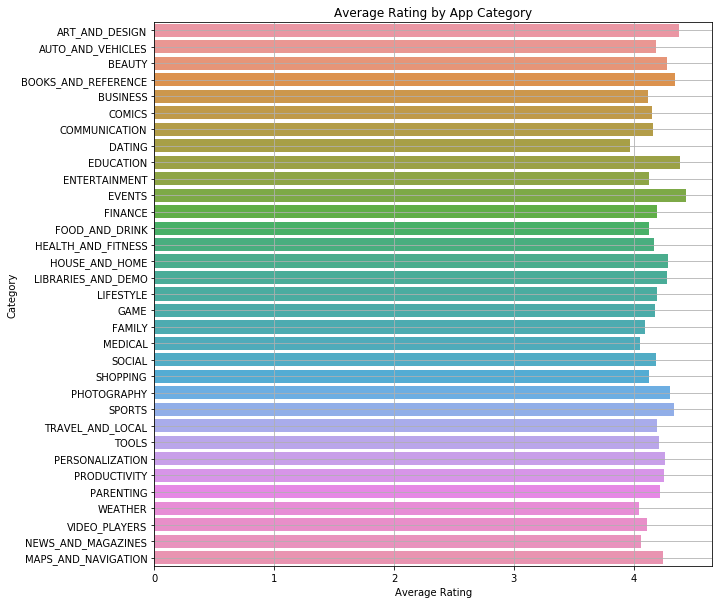

In [9]:
# Here we use the seaborn package to create a bar chart showing the average rating by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))
# We change the orientation to horizontal by using the orient = h parameter.
# This improves readability of the chart.
sns.barplot(average_rating_by_category, categories, orient="h")
plt.title("Average Rating by App Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.grid()
plt.show()

### At this stage it is difficult to tell the difference between the mean rating for each category.  We will sort the categories in ascending order by rating.

In [10]:
# We use the sort_values() method to sort the values in our average_rating_by_category variable.
average_rating_by_category_sorted = average_rating_by_category.sort_values()

# Our categories are currently in alphabetical order.
# We use the .index method on our average_rating_by_category_sorted variable to create a new variable holding the category names in order according to their rating mean.
categories_sorted_by_average_rating = average_rating_by_category_sorted.index

### We also notice that no category has a mean less than 3, yet our x-axis starts at 0.  Furthermore, the x-axis greatly exceeds the highest mean value.  We will therefore determine the lowest as well as the highest value, so that we can define a more appropriate x-axis.

In [11]:
# We print the first record from the average_rating_by_category_sorted so that we can see the value of the lowest mean.
print(average_rating_by_category_sorted.head(1))

# We use the .nlargest() method on our average_rating_by_category_sorted list to see the value of the single highest mean.
print(average_rating_by_category_sorted.nlargest(1))

Category
DATING    3.970769
Name: Rating, dtype: float64
Category
EVENTS    4.435556
Name: Rating, dtype: float64


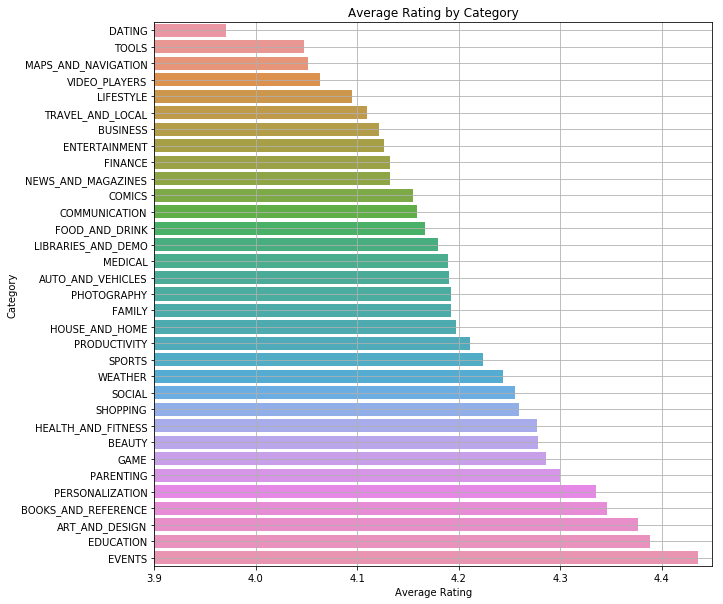

In [12]:
# We use the seaborn package to replot the average rating by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))
# This time, we use our sorted-variables, to produce an easier-to-read chart.
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_sorted, categories_sorted_by_average_rating, orient="h")
# Based on the lowest- and highest-valued means, we redfine the x-axis to further improve chart readability.
bar_chart_average_rating_by_category.set(xlim=(3.9,4.45))
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.grid()
plt.show()

## In this section we answer our second questions: how populous is each category; that is, which category has the most apps?

In [13]:
# Here we group our dataframe by the Category column, and use the count() function on the App column.
# This gives us a series of the number of apps per category, which we store in the variable number_of_apps_by_category.
number_of_apps_by_category = app_data_no_na.groupby("Category",sort=False)["App"].count()

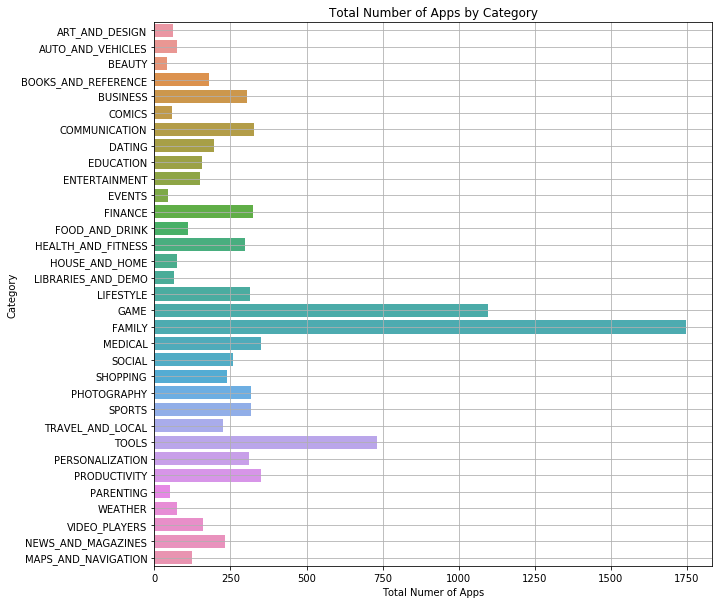

In [14]:
# We use seaborn to plot the total number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))

sns.barplot(number_of_apps_by_category, categories)
plt.title("Total Number of Apps by Category")
plt.xlabel("Total Numer of Apps")
plt.ylabel("Category")
plt.grid()

### As with our first graph, it is difficult to compare each category with this format.  We will therefore sort the categories in ascending order according to the number of apps.

In [15]:
# We use the sort_values() method to sort the values in our number_of_apps_by_category variable.
number_of_apps_by_category_sorted = number_of_apps_by_category.sort_values()

# Our categories are currently in alphabetical order.
# We use the .index method on our number_of_apps_by_category_sorted variable to create a new variable holding the category names in order according to the number of apps.
categories_sorted_by_number_of_apps = number_of_apps_by_category.index

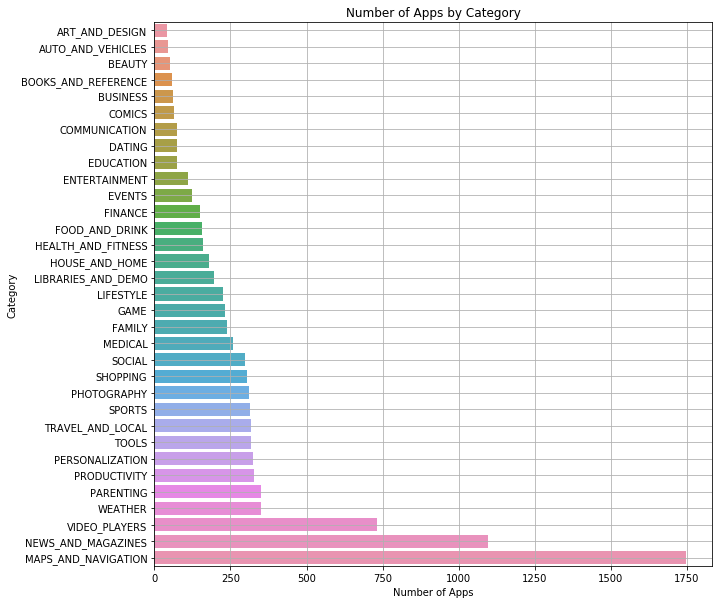

In [18]:
# We use seaborn to plot the number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))

# This time, we use our sorted-variables, to produce an easier-to-read chart.
sns.barplot(number_of_apps_by_category_sorted, categories_sorted_by_number_of_apps)
plt.title("Number of Apps by Category")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.grid()

## In this section, we answer our third question: how often is each category of apps installed; that is, what is the total number of installs by category?

### Before we proceed, we will look at the dataframe containing the app data.

In [ ]:
app_data_no_na.head(2)

### We notice that the entries in the installs column are not numeric values.  We are not able to perform numeric calculations on Installs until we have a reformated column.

In [ ]:
# We use the .nunique() method to show us the number of values in the Installs column that we must replace.
app_data_no_na["Installs"].nunique()

In [ ]:
# We use the .unique() method to show us a list of unique values in this column.
# We will have to replace each value in this list with a number that does not include the "+" sign.
app_data_no_na["Installs"].unique()

In [ ]:
app_data_no_na["Installs Numeric"] = app_data["Installs"].replace({"10,000+":10000,
                                                                  "500,000+":500000,
                                                                  "5,000,000+":5000000,
                                                                  "50,000,000+":50000000,
                                                                  "100,000+":100000,
                                                                  "50,000+":50000,
                                                                  "1,000,000+":1000000,
                                                                  "10,000,000+":10000000,
                                                                  "5,000+":5000,
                                                                  "100,000,000+":100000000,
                                                                  "1,000,000,000+":1000000000,
                                                                   "1,000+":1000,
                                                                   "500,000,000+":500000000,
                                                                   "100+":100,
                                                                   "500+":500,
                                                                   "10+":10,
                                                                   "5+":5,
                                                                   "50+":50,
                                                                   "1+":1})

In [ ]:
# We use the .nunique() method on the Installs Numeric column to confirm it has the same number of unique value as the pre-formatted Installs column.
app_data_no_na["Installs Numeric"].nunique()

In [ ]:
# We also use the .unique() method on the Installs Numeric column to check for any non-numeric values.
app_data_no_na["Installs Numeric"].unique()

In [ ]:
# Here we group our dataframe by the Category column, and use the sum() function on the Installs Numeric column.
# This gives us a series of the total number of installations per category, which we store in the variable total_installs_by_category.
total_installs_by_category = app_data_no_na.groupby("Category", sort=False)["Installs Numeric"].sum()

In [ ]:
# We use seaborn to plot the total number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))

sns.barplot(total_installs_by_category, categories, orient="h")
plt.title("Total Installs by App Category")
plt.xlabel("Number of Installations")
plt.ylabel("Category")
plt.grid()
plt.show()

### Like before, it is difficult to compare each category with this format.  We will therefore sort the categories in ascending order according to the number of installations by category.

In [ ]:
# We use the sort_values() method to sort the values in our average_rating_by_category variable.
total_installs_by_category_sorted = total_installs_by_category.sort_values()
categories_sorted_by_total_installs = total_installs_by_category_sorted.index







# Our categories are currently in alphabetical order.
# We use the .index method on our total_number_apps_by_category_sorted variable to create a new variable holding the category names in order according to the total number of apps.
categories_sorted_by_total_number_apps = total_number_apps_by_category_sorted.index